In [1]:
#Importing important libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("creditcard.csv")

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.shape

(284807, 31)

In [6]:
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 284807
Number of columns: 31


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
#Checking for null values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## Feature Scaling

In [10]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### It can be observed that Amount feature varies over a large range of values and so, feature scaling is needed for this feature

In [11]:
scaler = StandardScaler()
df["Amount"] = scaler.fit_transform(pd.DataFrame(df["Amount"]))
# same as this line :  df["Amount"] = (df["Amount"] - df["Amount"].mean())/ df["Amount"].std() 
# StandardScaler Replaces x = (x-x.mean())/x.std()

In [12]:
df["Amount"]

0         0.244964
1        -0.342475
2         1.160686
3         0.140534
4        -0.073403
            ...   
284802   -0.350151
284803   -0.254117
284804   -0.081839
284805   -0.313249
284806    0.514355
Name: Amount, Length: 284807, dtype: float64

## Removing duplicate transactions(rows) and unnecessary feature

In [13]:
df.drop(["Time"], axis = 1, inplace = True)

In [14]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [15]:
df.shape

(284807, 30)

In [16]:
df.duplicated().any()

True

In [17]:
df.drop_duplicates(inplace = True)

In [18]:
df.shape

(275663, 30)

In [19]:
print("Total number of duplicate rows:", 284807 - 275663)

Total number of duplicate rows: 9144


## Checking whether class imbalance is prevalent in the dataset or not

In [20]:
df["Class"].value_counts()

0    275190
1       473
Name: Class, dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

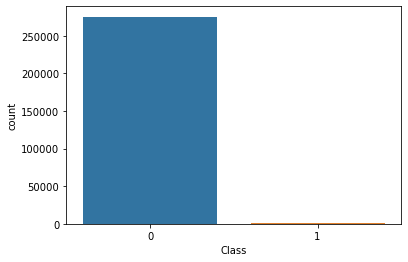

In [21]:
sns.countplot(df["Class"])

### It's clearly visible that most of the Class feature (Target variable) value is 0.

## Observing efficiency of model without using class balancing techniques:

In [22]:
X = df.drop("Class", axis = 1)
Y = df["Class"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)

### Logistic Regression

In [23]:
lor = LogisticRegression()
lor.fit(X_train, Y_train)
ypred1 = lor.predict(X_test)

In [24]:
accuracy_score(Y_test, ypred1)

0.9991874165650937

In [25]:
precision_score(Y_test, ypred1)

0.8648648648648649

In [26]:
recall_score(Y_test, ypred1)

0.5818181818181818

In [27]:
f1_score(Y_test, ypred1)

0.6956521739130435

### As it can be seen that while accuracy score is very high, the precision and recall score is low, indicating inefficient modelling .

## Using Class Balancing techniques:

## 1. Undersampling

In [28]:
normal = df[df["Class"]==0]
fraud =  df[df["Class"]==1]
print(normal.shape)
print(fraud.shape)

(275190, 30)
(473, 30)


In [29]:
normal_sample = normal.sample(n=473)
normal_sample.shape

(473, 30)

In [30]:
new_df = pd.concat([normal_sample, fraud])

In [31]:
new_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
241167,-2.101277,0.743317,-0.636575,-0.174545,0.745005,-0.780331,0.657199,0.075466,-0.035492,-0.532670,...,-0.321072,-0.937242,-0.333797,0.508801,-0.371627,0.132507,-1.067032,-0.533516,-0.281304,0
171780,-1.889429,-1.069619,1.380182,0.207097,-1.362718,1.511539,-0.000696,0.032575,2.269885,-0.279625,...,0.034086,1.071692,-0.081240,0.749613,-1.070374,0.597020,-0.637162,1.066216,0.655408,0
202852,2.037207,0.097437,-2.268812,0.117295,0.955893,-0.374117,0.280318,-0.244324,0.226975,-0.356456,...,0.195397,0.686452,-0.251291,-1.412687,0.434867,-0.044486,-0.006887,-0.045708,-0.185350,0
55514,1.279423,-0.046221,0.311370,0.269838,-0.002403,0.528610,-0.468834,0.180050,0.522859,-0.115801,...,-0.154619,-0.414465,-0.047215,-1.330691,0.262954,0.331415,0.006129,0.008133,-0.329281,0
107322,1.236306,0.304462,0.461877,1.115368,-0.418819,-0.902119,0.071169,-0.156727,0.133991,0.012884,...,-0.061354,-0.170718,-0.012187,0.359656,0.526001,-0.436758,0.019336,0.024225,-0.343234,0


In [32]:
new_df.shape

(946, 30)

In [33]:
new_df["Class"].value_counts()

0    473
1    473
Name: Class, dtype: int64

In [34]:
X = new_df.drop("Class", axis = 1)
Y = new_df["Class"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

### Logistic Regression

In [35]:
lor = LogisticRegression()
lor.fit(X_train, Y_train)
ypred1 = lor.predict(X_test)

In [36]:
accuracy_score(Y_test, ypred1)

0.968421052631579

In [37]:
precision_score(Y_test, ypred1)

0.9886363636363636

In [38]:
recall_score(Y_test, ypred1)

0.9456521739130435

In [39]:
f1_score(Y_test, ypred1)

0.9666666666666666

### Decision Tree Classification

In [40]:
dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)
ypred2 = dt.predict(X_test)

In [41]:
accuracy_score(Y_test, ypred2)

0.9526315789473684

In [42]:
precision_score(Y_test, ypred2)

0.946236559139785

In [43]:
recall_score(Y_test, ypred2)

0.9565217391304348

In [44]:
f1_score(Y_test, ypred2)

0.9513513513513514

## 2. Oversampling

In [45]:
X = df.drop('Class',axis=1)
Y = df['Class']
print(X.shape)
print(Y.shape)

(275663, 29)
(275663,)


In [46]:
X_new,Y_new = SMOTE().fit_resample(X,Y)

In [47]:
Y_new.value_counts()

0    275190
1    275190
Name: Class, dtype: int64

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X_new, Y_new, test_size = 0.2)

### Logistic Regression

In [49]:
lor = LogisticRegression()
lor.fit(X_train, Y_train)
ypred1 = lor.predict(X_test)

In [50]:
accuracy_score(Y_test, ypred1)

0.9455012900178059

In [51]:
precision_score(Y_test, ypred1)

0.9742376955434509

In [52]:
recall_score(Y_test, ypred1)

0.9149796096708418

In [53]:
f1_score(Y_test, ypred1)

0.9436792939961508

### Decision Tree Classification

In [54]:
dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)
ypred2 = dt.predict(X_test)

In [55]:
accuracy_score(Y_test, ypred2)

0.9982830044696391

In [56]:
precision_score(Y_test, ypred2)

0.9977992397373638

In [57]:
recall_score(Y_test, ypred2)

0.9987620157296825

In [58]:
f1_score(Y_test, ypred2)

0.9982803955999964